In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

# Data Preprocessing

In [37]:
X1=df.drop('price', axis=1)
Y=df['price']

In [38]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [39]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [40]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [41]:
df.duplicated().sum()

0

In [42]:
#so our data is cleaned by detol soap as i did not find any duplicate or null value

In [43]:
df['country'].unique()

array(['USA'], dtype=object)

In [44]:
# from sklearn.preprocessing import LabelEncoder
# le= LabelEncoder()

In [45]:
# x['country']=le.fit_transform(x['country'])

In [47]:
X1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [64]:
X1=X1.drop(columns=['sqft_lot',])

In [65]:
X1

,bedrooms,bathrooms,sqft_living,floors,condition,yr_built,yr_renovated
0,3.0,1.50,1340,1.5,3,1955,2005
1,5.0,2.50,3650,2.0,5,1921,0
2,3.0,2.00,1930,1.0,4,1966,0
3,3.0,2.25,2000,1.0,4,1963,0
4,4.0,2.50,1940,1.0,4,1976,1992
...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,1.0,4,1954,1979
4596,3.0,2.50,1460,2.0,3,1983,2009
4597,3.0,2.50,3010,2.0,3,2009,0
4598,4.0,2.00,2090,1.0,3,1974,0


In [66]:
Y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

# Data Visualization

In [52]:
correlation = X1.corr()

<Axes: >

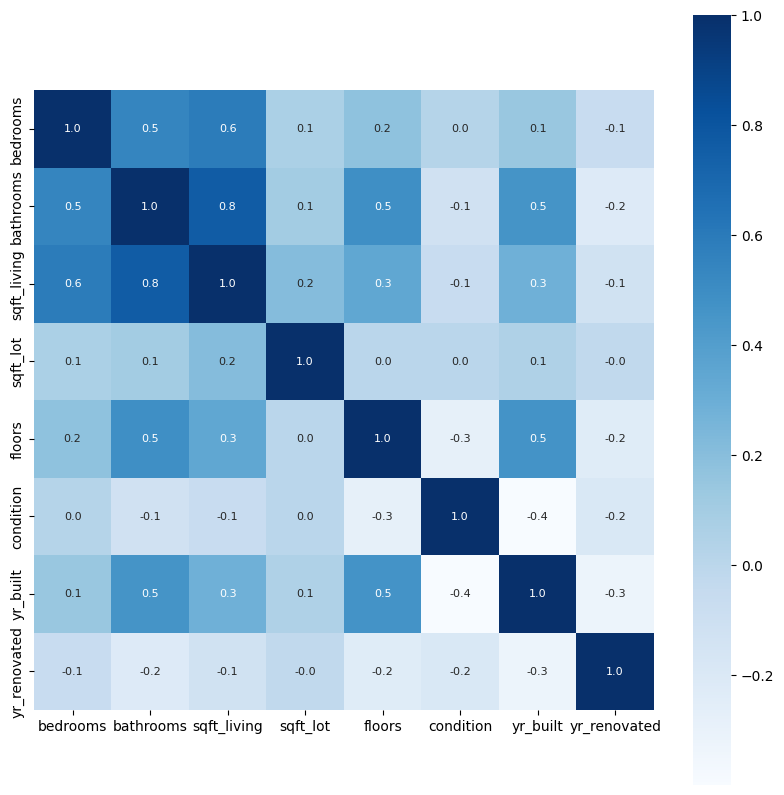

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

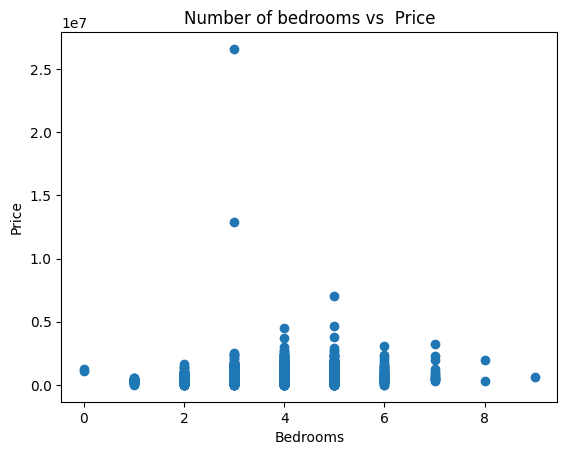

In [67]:
plt.scatter(df['bedrooms'], df['price'])
plt.title("Number of bedrooms vs  Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

# Split Data and Train Model

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, Y, test_size=0.2, random_state=42)

# decision Tree Algorithm

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import  accuracy_score

In [71]:
# Initialize the model with desired hyperparameters
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [72]:
# Predict on the test data
y_pred = model.predict(X_test)


In [73]:
# Calculate the mean squared error
ms = mean_squared_error(y_test, y_pred)

# Calculate the R^2 score
r = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {ms}")
print(f"R^2 Score: {r}")


Mean Squared Error: 1053928036262.8638
R^2 Score: -0.03341846201360421


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
# Initialize the model with desired hyperparameters
regressor = RandomForestRegressor(n_estimators=100, random_state=42)


In [74]:
# Fit the model to the training data
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [75]:
# Predict on the test data
y_pred = regressor.predict(X_test)


In [76]:
# Calculate the mean squared error
ms = mean_squared_error(y_test, y_pred)

# Calculate the R^2 score
r = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {ms}")
print(f"R^2 Score: {r}")


Mean Squared Error: 998820306356.2168
R^2 Score: 0.020616864427777437


In [77]:
import xgboost as xgb

In [78]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,max_depth=5, alpha=10, n_estimators=100)

xg_reg.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [79]:
preds = xg_reg.predict(X_test)


In [80]:
ms_error = mean_squared_error(y_test, preds)

# Calculate the R^2 score
r_two = r2_score(y_test, preds)

print(f"Mean Squared Error: {ms_error}")
print(f"R^2 Score: {r_two}")

Mean Squared Error: 984658933929.7089
R^2 Score: 0.03450265473742409
